## Loan Prediction III

http://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb

from __future__ import division

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.matplotlib.rc('axes',edgecolor='#c0c0c0')
plt.matplotlib.rc('axes',facecolor ='white')
plt.matplotlib.rc('axes',grid ='true')
plt.matplotlib.rc('grid',color ='f1f1f1')
plt.matplotlib.rc('figure',dpi = 600)

%matplotlib inline

### Functions

In [2]:
def prepare(X):
    
    for i in X.columns:
        top_v = Counter(X[i].values).most_common(1)[0][0]
        X[i].fillna(top_v, inplace=True)
     
    X = X.join((X.ApplicantIncome / X.LoanAmount).to_frame(name="k"))

    encoder = LabelEncoder()
    cat_columns = [c for c in X.columns if X[c].dtype.name == 'object']
    for ix, item in enumerate(cat_columns):
        X[item] = encoder.fit_transform(X[item])
    
    return X

### Main

In [3]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

X = train.drop(["Loan_ID","Loan_Status"],1)
y = train['Loan_Status']

Loan_ID = test["Loan_ID"].copy()
Z = test.drop(["Loan_ID"],1)

y.replace("Y",1,inplace=True)
y.replace("N",0,inplace=True)

X = prepare(X)
Z = prepare(Z)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
clf = xgb.XGBClassifier(n_estimators=90, max_depth=4)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

print "Accuracy: %0.3f" % accuracy_score(y_test, predictions)

Accuracy: 0.827


### Submission

#### Predict

In [4]:
predicts = clf.predict(Z).astype(str)
predicts [predicts == "1"] = "Y"
predicts [predicts == "0"] = "N"

#### Hack

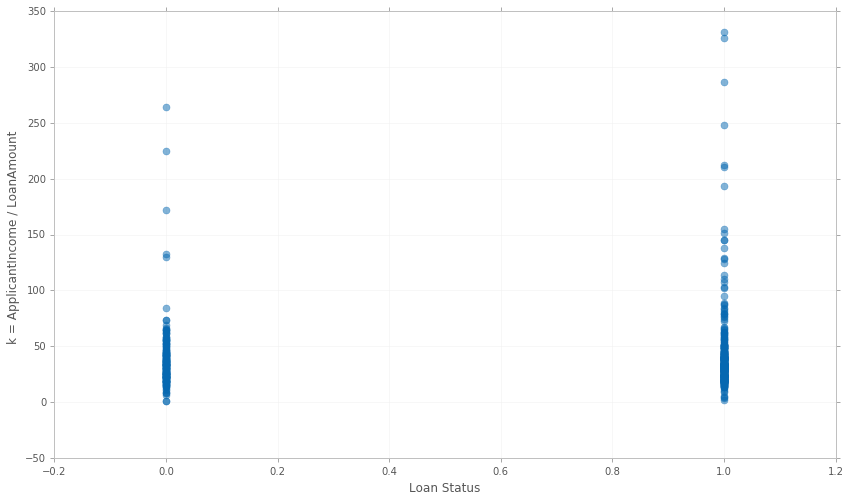

In [5]:
plt.figure(figsize=(14,8))
plt.scatter(y, X.k, color = "#0668b1", alpha = 0.5, s = 50)
plt.ylabel('k = ApplicantIncome / LoanAmount ')
plt.xlabel('Loan Status')
plt.show()

In [6]:
predicts[np.where(Z.k > 90),] = "Y"

#### submission.csv

In [7]:
submission = pd.DataFrame({"Loan_ID":Loan_ID, "Loan_Status": predicts})
submission.to_csv("submission.csv", index=False)